# 🍌🍎❓ Dataset Exploration: Banana, Apple, and Other


This notebook explores the updated 3-class image classification dataset consisting of:

- **Banana**
- **Apple**
- **Other** (random or out-of-class images)

We will check image distribution, visualize sample images, and inspect dataset statistics.


In [ ]:

import os
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.io import read_image
from torchvision.transforms import ToPILImage
from collections import defaultdict
import random
from collections import defaultdict
import pandas as pd
import torch
import sys
import os



In [45]:
import os
from collections import defaultdict

base_dir = '../dataset'
folders = ['train', 'val', 'test']

dataset_stats = defaultdict(lambda: defaultdict(int))

for split in folders:
    split_path = os.path.join(base_dir, split)
    for class_name in os.listdir(split_path):
        class_path = os.path.join(split_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            dataset_stats[split][class_name] = count

dataset_stats = dict(dataset_stats)
dataset_stats

{'train': defaultdict(int, {'apple': 91, 'banana': 91, 'other': 141}),
 'val': defaultdict(int, {'apple': 19, 'banana': 19, 'other': 30}),
 'test': defaultdict(int, {'apple': 21, 'banana': 21, 'other': 31})}

## 📊 Class Distribution per Split

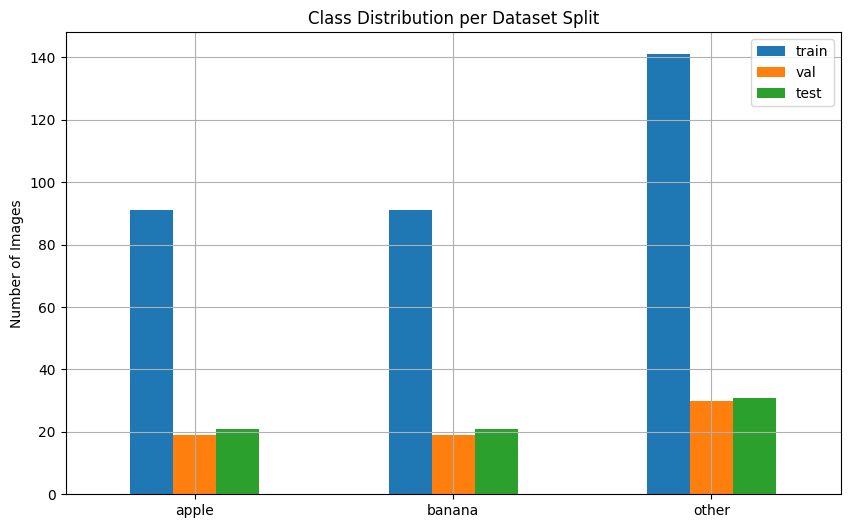

In [46]:

import pandas as pd

df_stats = pd.DataFrame(dataset_stats).fillna(0).astype(int)
df_stats.plot(kind='bar', figsize=(10, 6), title="Class Distribution per Dataset Split")
plt.ylabel("Number of Images")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


## 🖼️ Random Sample Images from Each Class

--- TRAIN ---


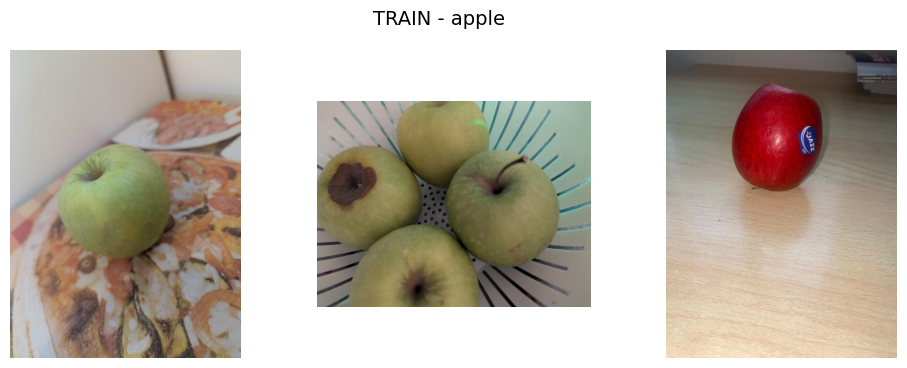

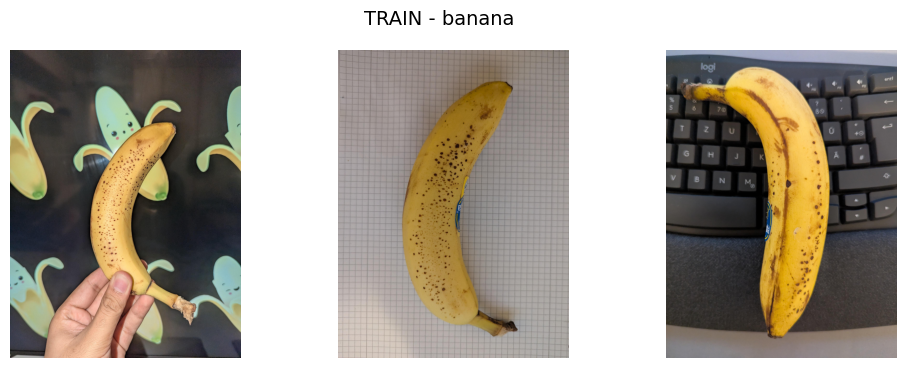

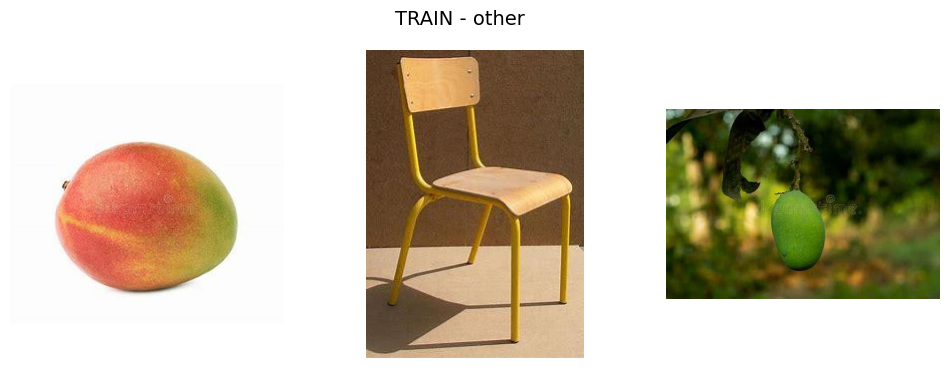

--- VAL ---


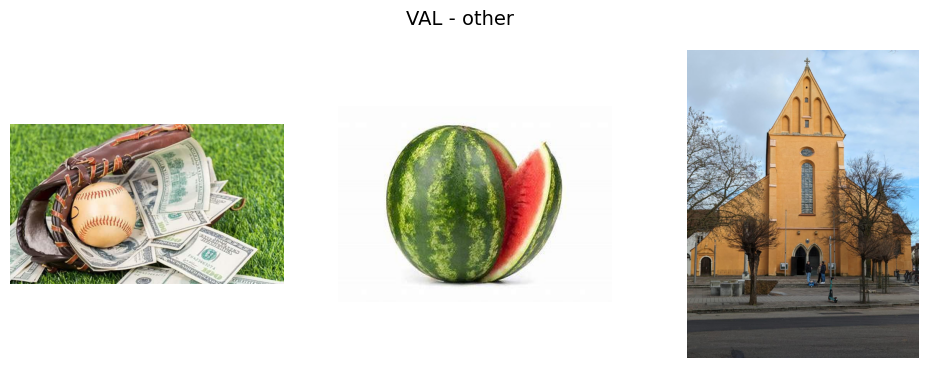

--- TEST ---


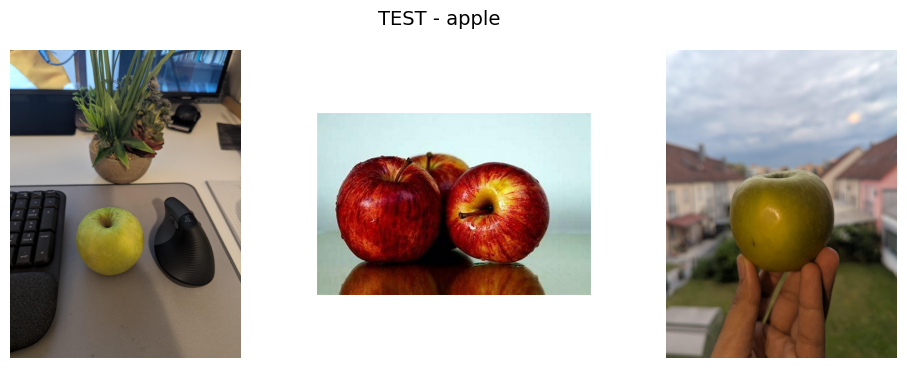

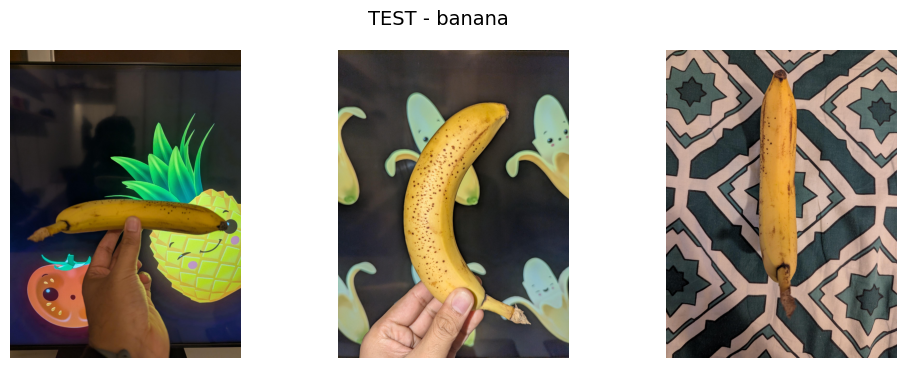

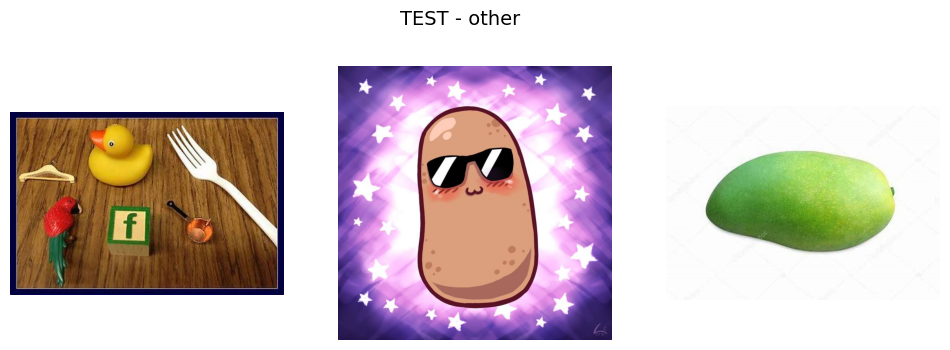

In [47]:

to_pil = ToPILImage()
n_samples = 3
for split in folders:
    print(f"--- {split.upper()} ---")
    for class_name in os.listdir(os.path.join(base_dir, split)):
        class_dir = os.path.join(base_dir, split, class_name)
        if os.path.isdir(class_dir):
            images = os.listdir(class_dir)
            sample_files = random.sample(images, min(n_samples, len(images)))
            fig, axs = plt.subplots(1, len(sample_files), figsize=(12, 4))
            fig.suptitle(f"{split.upper()} - {class_name}", fontsize=14)
            for i, img_name in enumerate(sample_files):
                img_path = os.path.join(class_dir, img_name)
                img = read_image(img_path)
                axs[i].imshow(to_pil(img))
                axs[i].axis('off')
            plt.show()


In [48]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_path = os.path.join(base_dir, 'train')
train_dataset = datasets.ImageFolder(train_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

images, labels = next(iter(train_loader))

mean_pixel = images.mean().item()
std_pixel = images.std().item()
img_shape = list(images.shape[1:])

print("Image Shape (C, H, W):", img_shape)
print("Mean Pixel Value:", round(mean_pixel, 4))
print("Std Pixel Value:", round(std_pixel, 4))
print("Class Names:", train_dataset.classes)


Image Shape (C, H, W): [3, 128, 128]
Mean Pixel Value: 0.4466
Std Pixel Value: 0.2797
Class Names: ['apple', 'banana', 'other']


In [49]:
class_names = train_dataset.classes
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i in range(6):
    img = images[i].permute(1, 2, 0).numpy()
    img = (img - img.min()) / (img.max() - img.min())  # normalize for display
    label = class_names[labels[i]]
    axs[i // 3, i % 3].imshow(img)
    axs[i // 3, i % 3].set_title(f'Class: {label}')
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


In [50]:
from model import BananaOrAppleClassifier

model = BananaOrAppleClassifier()
model.load_state_dict(torch.load('../../hf_app/banana_or_apple.pt', map_location='cpu'))
model.eval()


ModuleNotFoundError: No module named 'model'